<a href="https://www.kaggle.com/code/otavioduartepinheiro/netflix-movies-imdb-score?scriptVersionId=115663535" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Melhores Filmes Netflix de acordo com as notas do IMDB

In [1]:
#importando os pacotes necessários para o projeto 

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt 
import seaborn as sns 

In [2]:
dados = pd.read_csv('/kaggle/input/the-ultimate-netflix-tv-shows-and-movies-dataset/Best Movies Netflix.csv', encoding='UTF-8')
dados.head()

,index,TITLE,RELEASE_YEAR,SCORE,NUMBER_OF_VOTES,DURATION,MAIN_GENRE,MAIN_PRODUCTION
0,0,David Attenborough: A Life on Our Planet,2020,9.0,31180,83,documentary,GB
1,1,Inception,2010,8.8,2268288,148,scifi,GB
2,2,Forrest Gump,1994,8.8,1994599,142,drama,US
3,3,Anbe Sivam,2003,8.7,20595,160,comedy,IN
4,4,Bo Burnham: Inside,2021,8.7,44074,87,comedy,US


In [3]:
dados.drop(columns = 'index')

,TITLE,RELEASE_YEAR,SCORE,NUMBER_OF_VOTES,DURATION,MAIN_GENRE,MAIN_PRODUCTION
0,David Attenborough: A Life on Our Planet,2020,9.0,31180,83,documentary,GB
1,Inception,2010,8.8,2268288,148,scifi,GB
2,Forrest Gump,1994,8.8,1994599,142,drama,US
3,Anbe Sivam,2003,8.7,20595,160,comedy,IN
4,Bo Burnham: Inside,2021,8.7,44074,87,comedy,US
...,...,...,...,...,...,...,...
382,The Trip,2021,6.9,19706,113,comedy,NO
383,The Dirt,2019,6.9,47603,108,drama,US
384,Top Gun,1986,6.9,329656,110,drama,US
385,Radhe Shyam,2022,6.9,21328,138,romance,IN


In [4]:
score_paises = pd.DataFrame(dados.groupby('MAIN_PRODUCTION')['SCORE'].mean())
print(type(score_paises))

<class 'pandas.core.frame.DataFrame'>


In [5]:
score_paises.head()

,SCORE
MAIN_PRODUCTION,
AR,7.500000
AU,7.566667
BE,7.450000
BR,7.200000
CA,7.350000


In [6]:
# Nota média dos filmes agrupados por países
score_paises.sort_values(by='SCORE', ascending=False).head()

,SCORE
MAIN_PRODUCTION,
CD,8.200000
UA,8.100000
ZA,8.100000
TR,7.842857
NZ,7.800000


In [7]:
# Nota média dos filmes ordenados pelos generos dos filmes:
score_genre = pd.DataFrame(dados.groupby('MAIN_GENRE')['SCORE'].mean()).reset_index()
score_genre.sort_values(by=['SCORE'], ascending = False)

,MAIN_GENRE,SCORE
13,war,7.800000
10,scifi,7.771429
4,documentary,7.760000
0,action,7.700000
2,comedy,7.606897
14,western,7.557143
6,fantasy,7.484211
5,drama,7.477483
3,crime,7.466667
12,thriller,7.466102


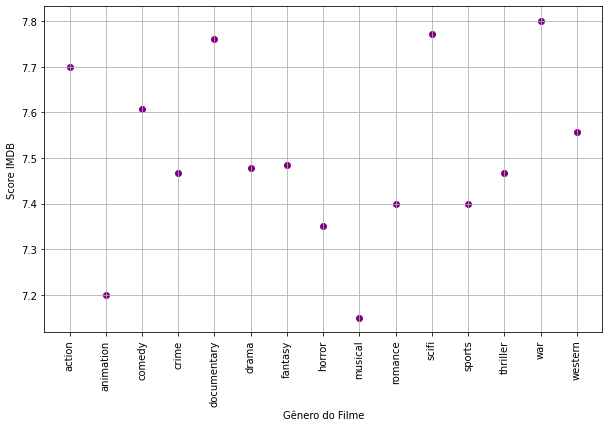

In [8]:
plt.figure(figsize = (10, 6)) 
plt.scatter(score_genre['MAIN_GENRE'], score_genre['SCORE'], c = 'purple') 
plt.xticks(rotation = 90)
plt.grid() 
plt.ylabel("Score IMDB") 
plt.xlabel("Gênero do Filme") 
plt.show() 

In [9]:
# Adicionando um novo dataset para sabermos qual o nome do país correspondente a sigla ISO (2 letras) da coluna MAIN_PRODUCTION:
paises = pd.read_csv('/kaggle/input/CountriesCodISO2letters/COUNTRIES_COD_ISO_2.csv', encoding='UTF-8')
print(type(paises))

<class 'pandas.core.frame.DataFrame'>


In [10]:
paises.rename({"Código ISO - 2 letras": "COD_PAIS"}, axis=1, inplace=True)

In [11]:
paises.rename({"País": "PAIS"}, axis=1, inplace=True)

In [12]:
paises.rename({"COD_PAIS": "MAIN_PRODUCTION"}, axis=1, inplace=True)

In [13]:
paises.head()

,PAIS,MAIN_PRODUCTION
0,Afeganistão,AF
1,África do Sul,ZA
2,Albânia,AL
3,Alemanha,DE
4,Andorra,AD


In [14]:
# Juntando a coluna PAIS dos 2 dataset para sabermos qual o nome do país correspondente a sigla ISO (2 letras) da coluna MAIN_PRODUCTION:
df = pd.merge(dados, paises, on=['MAIN_PRODUCTION'])

In [15]:
print(dados.shape)
print(paises.shape)
print(df.shape)

(387, 8)
(201, 2)
(384, 9)


In [16]:
df.shape

(384, 9)

In [17]:
df.head()

,index,TITLE,RELEASE_YEAR,SCORE,NUMBER_OF_VOTES,DURATION,MAIN_GENRE,MAIN_PRODUCTION,PAIS
0,0,David Attenborough: A Life on Our Planet,2020,9.0,31180,83,documentary,GB,Reino Unido
1,1,Inception,2010,8.8,2268288,148,scifi,GB,Reino Unido
2,19,Full Metal Jacket,1987,8.3,723306,116,drama,GB,Reino Unido
3,28,Monty Python and the Holy Grail,1975,8.2,530877,91,comedy,GB,Reino Unido
4,33,Bill Burr: Paper Tiger,2019,8.1,10649,67,comedy,GB,Reino Unido


In [18]:
# Nota média de filmes agrupado pelos nomes dos países:
score_paises2 = pd.DataFrame(df.groupby('PAIS')['SCORE'].mean()).reset_index()
score_paises2.sort_values(by='SCORE', ascending=False)

,PAIS,SCORE
27,República Democrática do Congo,8.200000
30,Ucrânia,8.100000
31,África do Sul,8.100000
29,Turquia,7.842857
23,Nova Zelândia,7.800000
21,México,7.700000
28,Tailândia,7.600000
20,Maláui,7.600000
32,Índia,7.592174
26,Reino Unido,7.568966


In [19]:
# Quantidade de filmes por genero:
quant_genero = df.groupby('MAIN_GENRE')['index'].count().reset_index(name='COUNT')
quant_genero.sort_values(by='COUNT', ascending=False).head()

,MAIN_GENRE,COUNT
5,drama,149
12,thriller,59
2,comedy,57
3,crime,21
9,romance,21


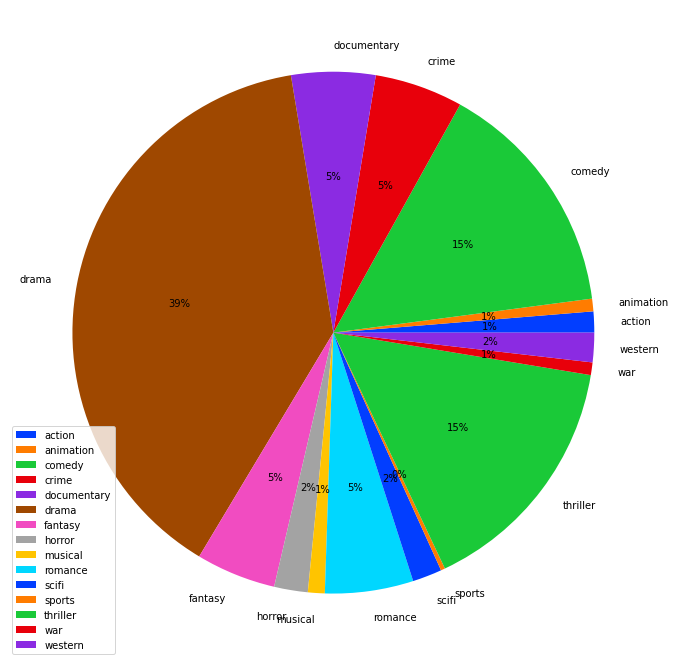

In [20]:
# Gráfico que mostra a classificação dos gêneros dos filmes da lista

plt.figure(figsize = (12,12))
#define data
data = quant_genero['COUNT']
labels = quant_genero['MAIN_GENRE']

#define Seaborn color palette to use
colors = sns.color_palette('bright')[0:15]

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.legend(quant_genero['MAIN_GENRE'], loc=3)
plt.show()

In [21]:
df.head()

,index,TITLE,RELEASE_YEAR,SCORE,NUMBER_OF_VOTES,DURATION,MAIN_GENRE,MAIN_PRODUCTION,PAIS
0,0,David Attenborough: A Life on Our Planet,2020,9.0,31180,83,documentary,GB,Reino Unido
1,1,Inception,2010,8.8,2268288,148,scifi,GB,Reino Unido
2,19,Full Metal Jacket,1987,8.3,723306,116,drama,GB,Reino Unido
3,28,Monty Python and the Holy Grail,1975,8.2,530877,91,comedy,GB,Reino Unido
4,33,Bill Burr: Paper Tiger,2019,8.1,10649,67,comedy,GB,Reino Unido


In [22]:
# Top 10 melhores filmes dessa lista (de acordo com a nota do IMDB):
top_10 = df[['TITLE', 'SCORE']].sort_values(by=['SCORE'], ascending=False)
top_10 = top_10.head(10)
top_10

,TITLE,SCORE
0,David Attenborough: A Life on Our Planet,9.0
1,Inception,8.8
29,Forrest Gump,8.8
186,Anbe Sivam,8.7
30,Bo Burnham: Inside,8.7
31,Saving Private Ryan,8.6
189,Black Friday,8.4
32,Django Unchained,8.4
33,Bo Burnham: Make Happy,8.4
34,Louis C.K.: Hilarious,8.4


In [23]:
# Top 10 piores filmes dessa lista (de acordo com a nota do IMDB):
piores_10 = df[['TITLE', 'SCORE']].sort_values(by=['SCORE'], ascending=True)
piores_10 = piores_10.head(10)
piores_10

,TITLE,SCORE
383,The Night Comes for Us,6.9
169,Any Given Sunday,6.9
170,The Long Riders,6.9
171,Get on Up,6.9
172,Then Came You,6.9
173,Cloudy with a Chance of Meatballs,6.9
174,Our Souls at Night,6.9
175,The Meyerowitz Stories (New and Selected),6.9
176,I Don't Feel at Home in This World Anymore,6.9
177,The Highwaymen,6.9


In [24]:
# Mais antigo e mais recente ano de de lançamento dos filmes da lista:
print(df['RELEASE_YEAR'].min())
print(df['RELEASE_YEAR'].max())

1954
2022


In [25]:
# Notas de filmes de acordo com as décadas:

# Criando a coluna 'DECADA' e configurando as regras de acordo com a coluna 'RELEASE_YEAR':
df['DECADA'] = int()
df.loc[(df['RELEASE_YEAR'] > 1950) & (df['RELEASE_YEAR'] < 1961), 'DECADA'] = 1950
df.loc[(df['RELEASE_YEAR'] > 1960) & (df['RELEASE_YEAR'] < 1971), 'DECADA'] = 1960
df.loc[(df['RELEASE_YEAR'] > 1970) & (df['RELEASE_YEAR'] < 1981), 'DECADA'] = 1970
df.loc[(df['RELEASE_YEAR'] > 1980) & (df['RELEASE_YEAR'] < 1991), 'DECADA'] = 1980
df.loc[(df['RELEASE_YEAR'] > 1990) & (df['RELEASE_YEAR'] < 2001), 'DECADA'] = 1990
df.loc[(df['RELEASE_YEAR'] > 2000) & (df['RELEASE_YEAR'] < 2011), 'DECADA'] = 2000
df.loc[(df['RELEASE_YEAR'] > 2010) & (df['RELEASE_YEAR'] < 2021), 'DECADA'] = 2010
df.loc[(df['RELEASE_YEAR'] > 2020) & (df['RELEASE_YEAR'] < 2031), 'DECADA'] = 2020

In [26]:
# Agrupando as notas por décadas:
notas_decadas = pd.DataFrame(df.groupby('DECADA')['SCORE'].mean()).reset_index()
notas_decadas.sort_values(by='SCORE', ascending=False)

,DECADA,SCORE
2,1970,7.828571
3,1980,7.777778
1,1960,7.575000
5,2000,7.552941
0,1950,7.500000
6,2010,7.489640
4,1990,7.472000
7,2020,7.412903


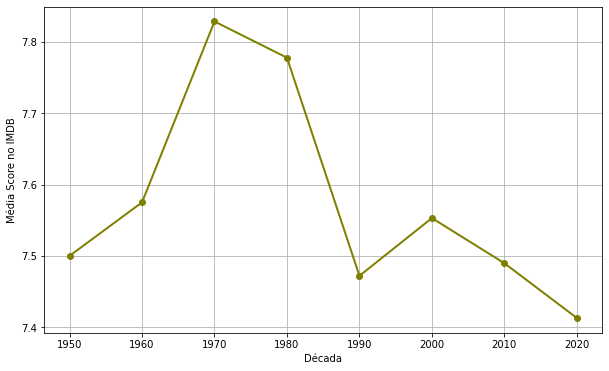

In [27]:
# Gráfico mostrando que filmes da Década de 1970 e 1980 tiveram as maiores média de nota do IMDB
# e por outro lado, os filmes da década de 2020 possuem a média mais baixa
plt.figure(figsize = (10,6)) 
plt.plot(notas_decadas['DECADA'],notas_decadas['SCORE'],marker='o', color='olive', linewidth=2) 
plt.xlabel('Década') 
plt.ylabel('Média Score no IMDB')
plt.grid()
plt.show() 

In [28]:
# Quantidade de filmes por país:
quant_pais = df.groupby('PAIS')['index'].count().reset_index(name='COUNT')
quant_pais = quant_pais.sort_values(by='COUNT', ascending=False).head(10)
quant_pais.head()

,PAIS,COUNT
12,Estados Unidos,157
32,Índia,115
26,Reino Unido,29
18,Japão,9
0,Alemanha,9


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


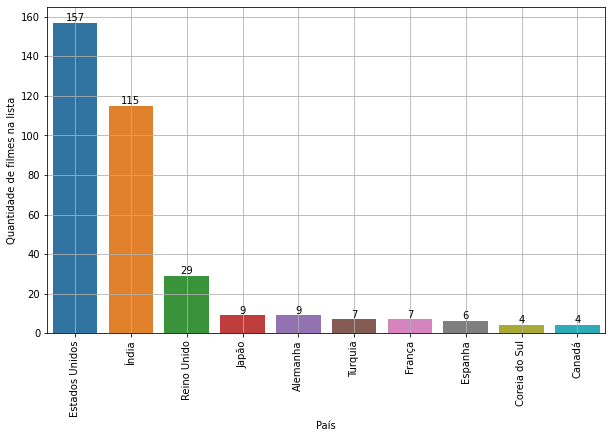

In [29]:
# Gráfico que mostra a quantidade de filmes por país
plt.figure(figsize = (10,6)) 
ax = sns.barplot(quant_pais['PAIS'],quant_pais['COUNT']) 
ax.bar_label(ax.containers[0]) 
plt.xticks(rotation = 90) 
plt.xlabel('País') 
plt.ylabel('Quantidade de filmes na lista')
plt.grid() 
plt.show() 